# Erkunden der Daten

In diesem Kapitel befassen wir uns mit Methoden, die wir einsetzen können um die Daten zu verstehen. Man spricht auch vom *Lernen der Daten*. Das heißt das wir die Struktur, den Umfang (z.B. Größe und Anzahl von Datenpunkten), sowie den Wertebereich der Daten lernen müssen. Eventuell wird auch ein Verständnis der Datenquellen benötigt, wenn die Richtigkeit und Zuverlässigkeit der Daten relevant ist oder wir die Gründe für unvollständige Daten näher beleuchten wollen. 

Es gibt sehr viele Methoden, die man zur Erkundung von Daten einsetzen kann. Die Erkundung selbst ist ein durch Werkzeuge unterstützter interaktiver Prozess. Es ist üblich verschiedene Werkzeuge zu benutzen, basierend auf dem Aspekt den man aktuell erkunden möchte. Im Folgenden gehen wir einige wichtige Werkzeuge durch, die uns dabei helfen Daten zu verstehen. 

Im nutzen wir die Notation $x = (x_1, ..., x_n)$ mit $x_1, ..., x_n \in \mathbb{R}$. Der Wert $x$ beschreibt also einen Vektor von reellen Zahlen. Wenn es sich bei $x$ um eine Teilmenge der möglichen Daten handelt, nennt man $x$ auch *Stichprobe* (engl. *sample*). Der Einfachheit halber können Sie sich $x$ auch einfach als Menge von Zahlen vorstellen. Dies ist zwar für die Vorstellung of einfacher, jedoch formal nicht korrekt, da Mengen nicht das gleiche Element mehrfach enthalten können, Datensätze jedoch schon.

## Texteditoren und die Kommandozeile

Bereits sehr einfache Werkzeuge können uns helfen, die Daten zu verstehen. Texteditoren und einfache Kommandozeilenbefehle wie `head`, `more`, und `less` ermöglichen es sich den Inhalt Textdateien direkt anzusehen. Hierdurch kann man beliebige Daten, die nicht im Binärformat vorliegen, inspizieren. Das ist durchaus häufig der Fall, zum Beispiel bei *Comma-Separated Values* (CSV), der *eXtensible Markup Language* (XML), oder der *JavaScript Object Notation* (JSON). Wir könnten uns zum Beispiel direkt den Quelltext dieses Kapitels angucken, um das Format der Daten, die in Jupyter Notebooks gespeichert werden, zu verstehen:

In [1]:
!head kapitel_04.ipynb

{
 "cells": [
  {
   "cell_type": "markdown",
   "id": "hourly-iraqi",
   "metadata": {},
   "source": [
    "# Erkunden der Daten\n",
    "\n",
    "In diesem Kapitel befassen wir uns mit Methoden, die wir einsetzen können um die Daten zu verstehen. Man spricht auch vom *Lernen der Daten*. Das heißt das wir die Struktur, den Umfang (z.B. Größe und Anzahl von Datenpunkten), sowie den Wertebereich der Daten lernen müssen. Eventuell wird auch ein Verständnis der Datenquellen benötigt, wenn die Richtigkeit und Zuverlässigkeit der Daten relevant ist oder wir die Gründe für unvollständige Daten näher beleuchten wollen. \n",


Durch diesen einfachen Befehl, der nur die ersten Zeilen der Datei anzeigt, können wir viel über die Daten lernen: Die Daten sind im JSON Format als Liste von Zellen (`cells`) gespeichert. Für jede Zelle werden der Typ, eine Identifier, eventuelle Metadaten, sowie der Quelltext der Zelle als Liste gespeichert, wobei jeder Listeneintrag eine Zeile des Quelltextes ist. All das, nur mit einem einfachen Kommandozeilenbefehl. 

> **Bemerkung:**
>
> Man kann durch ein Ausrufezeichen als Präfix beliebige Kommandozeilenbefehle (z.B. bash) direkt aus einem Jupyter Notebook aufrufen. Daher ist `!head` in einem Juypter Notebook äquivalent zur Eingabe von `head` direkt in der Kommandozeile. Welche Befehle zur Verfügung stehen, hängt von der Ausführungsumgebung ab. Weil die Kommandozeile von Windows den Befehl `head` nicht kennt, würde dies zum Beispiel eventuell nicht funktionieren. 

Dies ist natürlich nur eine Möglichkeit die Art, wie Jupyter Notebooks Daten speichern, zu betrachten. Und wie die meisten sehr einfachen Lösungen, gibt es natürlich auch schwächen. Es ist zum Beispiel nicht klar, ob es noch weitere Informationen gibt, die für Zellen gespeichert werden könnten, da der betrachtete Auszug eventuell nicht alle Möglichkeiten des Datenformats ausschöpft. Daher ist es auch wichtig, dass die Metadaten betrachtet werden, in diesem Fall die Dokumentation des Datenformats [^jupyterformat]. Dort findet man zum Bespiel raus, dass es noch weitere Felder gibt, wie zum Beispiel das Feld `nbformat` um die Version des Datenformats anzuzeigen. Eine gute Dokumentation der Metadaten beschreibt das Datenformat vollständig, das heißt welche Felder es gibt, welche Informationen in einem Feld gespeichert werden und wie die Felder zusammenhängen. 

Die Metadaten sind nicht notwendigerweise auf die Beschreibung der Daten selbst beschränkt. Es könnten zum Beispiel auch Links zu weiterführenden Informationen zur Verfügung gestellt werden. Außerdem könnten auch die Datenquellen beschrieben sein. Was man in den Metadaten üblicherweise nicht vorfindet ist eine Beschreibung der Werte, welche die Daten in einem Datensatz haben. Hier findet man höchstens Beispiele, die veranschaulichen welche Werte angenommen werden können. Dies ist ein Nachteil gegenüber der direkten Betrachtung der Daten, wobei die Erkenntnisse über die Daten Werte der Daten, die man mit Hilfe eines Texteditors bekommen kann ebenfalls stark limitiert ist, gerade bei großen Datenmengen. Hierfür sind die Statistiken und Visualisierungen, die wir im Folgenden betrachten, deutlich besser geeignet. 

## Deskriptive Statistik

Die *deskriptive* Statistiik beschäftigt sich mit der Beschreibung von Eigenschaften eines Datensatzes durch einzelne, häufig numerische, Werte. Deskriptive Statistiken sollten nicht mit *induktiver* Statistik verwechselt werden, bei der es darum geht Eigenschaften von Daten vorherzusagen. Entsprechend sollte man nicht annehmen, dass deskriptive Statistiken für zuverlässige Vorhersagen von zukünftigen Werten geeignet sind. 

In diesem Kapitel betrachten wir die folgenden deskriptiven Statistiken: 
- Die *Lage* der Daten (engl. *central tendency*), durch das *arithmetische Mittel*, den *Median*, und den *Modus*. 
- Die Variabilität der Daten, durch die *Standardabweichung*, den *Interquartilsabstand* (IQR), und den *Median der absoluten Abweichung vom Median* (MAD). 
- Die Datenbereich (engl. *range*), durch das *Minimum* und *Maximum*. 

Es gibt noch viele weitere deskriptive Statistiken für die obigen Eigenschaften, die wir in diesem Kapitel nicht betrachten, zum Beispiel das harmonische Mittel für die Lage. Weiterhin gibt es noch weitere Eigenschaften, die sich durch deskriptive Statistiken erfassen lassen, zum Beispiel die *Form* (engl. *shape*) der Daten durch die *Kurtose* (Wölbung) und die *Schiefe* (engl. *skewness*). Diese gehen jedoch über die Betrachtungen dieses Kapitels hinaus und werden häufig auch nicht benötigt, insbesondere wenn man deskriptive Statistiken zusammen mit Visualisierungen benutzt. 

### Lagemaße

Die Lage der Daten ist ein wichtiges statistisches Merkmal welches den *typischen Wert* im Zentrum der Daten beschreibt. Dies bedeutet nicht, das viele Datenpunkte exakt diesen Wert haben oder das man in der Zukunft erwarten könnte häufig diesen Wert zu beobachten. Stattdessen markiert die Lage die "Mitte" der Daten. Wenn Sie sich die Daten als Stadt vorstellen, markiert die Lage also nur den Mittelpunkt der Stadt. Das heißt jedoch nicht, dass dort besonders viele Häuser stehen. 

Es gibt verschiedene Wege die Lage von Daten zu definieren. Das *arithmetische Mittel* ist definiert als

$$mean(x) = \frac{1}{n}\sum_{i=1}^{n} x_i,$$

also die Summe der Datenpunkte geteilt durch ihre Anzahl. Häufig spricht man auch einfach vom *Mittelwert* der Daten (engl. *mean*). Das arithmetische Mittel ist eine gute Beschreibung der Lage, wenn die Daten normalverteilt oder gleichverteilt sind. Im Allgemeinen sollte man das arithmetische Mittel nur verwenden, wenn zwei Eigenschaften erfüllt sind:

1. Es gibt keine "Lücken" in den Daten, also größere Bereiche in denen keine Werte liegen. Dies bedeutet insbesondere auch, dass die Daten keine Ausreißer haben sollten. 
2. Die Daten sind symmetrisch um das arithmetische Mittel verteilt, das heißt, dass die Verteilung links und rechts des arithmetische Mittels ist in etwa gleich sein sollten.

Statistische Methoden, die derartige Annahmen an die Verteilung von Daten machen nennt man auch *parametrische* Statistiken. Wenn diese Eigenschaften nicht erfüllt sind, sollte man das arithmetische Mittel nicht verwenden, da der Wert eventuell die Lage nicht gut beschreibt. Wir werden uns später noch anhand von Anscombes Quartet sehen, wie die Werte von Statistiken irreführend sein können. 

Eine alternative zum arithmetischen Mittel ist der *Median*, der definiert ist als

$$median(x) = \begin{cases}\bar{x}_{m} & \text{wenn}~n~\text{ungerade ist mit}~m=\frac{n+1}{2} \\ \frac{1}{2}(\bar{x}_{m}+\bar{x}_{m+1}) & \text{wenn}~n~\text{gerade ist mit}~m=\frac{n}{2},\end{cases}$$

wobei $\bar{x}$ eine nach der Größe sortierter Vektor der Werte von $x$ ist. Entsprechend ist der Median wortwörtlich in der Mitte der der Daten: 50% der Daten sind kleiner oder gleich dem Median und 50% sind größer oder gleich dem Median. Im Gegensatz zum arithmetischen Mittel ist der Median eine *nicht parametrische* Statistik. Das bedeutet das der Median unabhängig von der Verteilung eingesetzt werden kann, zum Beispiel wenn die Annahmen an das arithmetische Mittel nicht erfüllt sind. Insbesondere ist der Median robust gegen Ausreißer, kann also nicht durch wenige besonders hohe oder niedrige Werte beeinflusst werden. 

Dies kann man sich auch an einem einfachen Beispiel verdeutlichen. Zuerst betrachten wir das arithmetische Mittel und den Median für Daten, bei denen die Annahmen des arithmetischen Mittels erfüllt sind:

In [2]:
import statistics  # we use the statistics from the Python standard library

data = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

print('Daten ohne Ausreißer:', data)
print('mean:  ', statistics.mean(data))
print('median:', statistics.median(data))

Daten ohne Ausreißer: [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
mean:   7.500909090909091
median: 7.58


In diesem Beispiel sind die Werte vom Median und vom arithmetischen Mittel ähnlich und beide sind gut geeignet und die Lage zu beschreiben. Jetzt erweitern wir die Daten um einen einzelnen Ausreißer.

In [3]:
data.append(100)
print('Daten mit Ausreißer:', data)
print('mean:  ', statistics.mean(data))
print('median:', statistics.median(data))

Daten mit Ausreißer: [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68, 100]
mean:   15.209166666666667
median: 7.81


Durch den Ausreißer wird das arithmetische Mittel stark beeinflusst, so dass es jetzt deutlich höher ist. Es ist sogar höher als alle Datenpunkte, die wir ursprünglich betrachtet haben. Das ist offensichtlich keine gute Beschreibung der Mitte der Daten. Im Vergleich dazu, hat sich der Median kaum verändert und ist nur zum nächsthöheren Wert der sortieren Liste gesprungen. 

Eine berechtigte Frage ist, warum wir das das arithmetische Mittel überhaupt betrachten, wenn der Median scheinbar aufgrund seiner Robustheit überlegen ist. Die Gründe hierfür kommen aus der Stochastik. Das arithmetische Mittel ist eng verwandt mit dem Erwartungswert von Zufallsvariablen. Die Normalverteilung kann man vollständig durch den Mittelwert und die Standardabweichung beschreiben. Hieraus folgt, dass das arithmetische Mittel für die Normalverteilung der bestmögliche Schätzer für die Mitte der Daten ist. Trotzdem ist es ratsam den Median zu verwenden, wenn wir die Verteilung der Daten nicht kennen oder wir befürchten das es Ausreißer gibt.

Das arithmetische Mittel und der Median sind nur für numerische Daten definiert. Es gibt jedoch auch nicht-numerische Daten. Die Größe von Kleidungsstücken wird häufig in den Kategorien "Small", "Medium", und "Large" angegeben. Man spricht hierbei von kategorischen Daten (siehe [Kapitel 3](kapitel_03)). Der *Modus* der Daten kann benutzt werden um die Lage von kategorischen Daten zu bestimmen. Der Modus ist definiert als der Wert, den man am häufigsten in einer Stichprobe $x$ beobachtet. 

In [4]:
data = ['small', 'medium', 'small', 'large', 'large', 'medium', 'medium']
print('Daten:', data)
print('Modus:', statistics.mode(data))

Daten: ['small', 'medium', 'small', 'large', 'large', 'medium', 'medium']
Modus: medium


Bitte beachten Sie, dass der Modus zwar gut für kategorische Daten (und manchmal auch für diskret Verteilte numerische Daten) geeignet ist, aber irreführend sein kann, wenn die Daten *Bimodal* oder *Multimodal* sind. Derartige Daten setzen sich aus zwei oder mehr Verteilungen zusammen und haben daher mehrere "Mittelpunkte", was sich dadurch äußert das mehrere Werte besonders häufig auftreten. Im Extremfall sind die Kategorien gleichverteilt, so dass es gleich viele Beobachtungen jeder Kategorie gibt. Da dann jede Kategorie die gleiche Wahrscheinlichkeit hat, ist der Modus zufällig. Außerdem sollte man den Modus nicht für kontinuierliche numerische Daten benutzen, da es hier sehr unwahrscheinlich ist mehrfach den exakt gleichen Wert zu beobachten. 

### Variabilität

Die Variabilität misst wie stark die Daten verstreut sind. Eine kleine Variabilität heißt, dass sich viele Daten in der Nähe der Mitte befinden. Eine hohe Variabilität heißt dagegen, dass die Daten sich über einen großen Bereich verteilen. 

Das am häufigsten verwendete Maß für die Variabilität ist die *Standardabweichung*, die als

$$sd(x) = \sqrt{\frac{\sum_{i=1}^n (x_i-mean(x))^2}{n-1}}$$

definiert ist. Die Standardabweichung ist die Quadratwurzel des arithmetischen Mittels von der Abweichung der einzelnen Datenpunkte vom arithmetischen Mittel, nur dass bei der Standardabweichung durch $n-1$ statt $n$ geteilt wird. Der Grund hierfür sind die sogenannten *Freiheitsgrade*, auf die wir hier jedoch nicht näher eingehen. Auch wenn die Formulierung etwas kompliziert klingt, ist das Konzept einfach: Die Standardabweichung misst, wie stark die beobachteten Werte vom arithmetischen Mittel abweichen. Dadurch, dass die quadratischen Abweichungen betrachtet werden, beeinflussen große Abweichungen die Standardabweichung stärker als kleine Abweichungen. Da die Standardabweichung die Variabilität in Bezug auf das arithmetische  Mittel misst, ist auch klar, dass die Standardabweichung nur dann benutzt werden sollte, wenn das arithmetische Mittel eine geeignete Repräsentation für die Lage der Daten ist. Hieraus folgt auch, das die Standardabweichung ebenfalls ein parametrisches Maß für die Variabilität ist. 

Ebenso wie es mit dem Median eine nicht-parametrisches Gegenstück zum arithmetischen Mittel gibt, gibt es auch nicht-parametrische Statistiken für die Variabilität. Der Interquartilsabstand (engl. *interquartile range*) is definiert als

$$IQR(X) = Q_{upper}-Q_{lower}$$

wobei $Q_{upper}$ und $Q_{lower}$ das obere und untere *Quartil* der Daten sind. Die Quartile sind analog zum Median definiert, nur mit 75%, bzw. 25% der Daten: 75% der Daten sind kleiner oder gleich dem oberen Quartil und 25% der Daten sind kleiner oder gleich dem unteren Quartil. Entsprechend sind mindestens 50% der Daten größer oder gleich dem unteren Quartil und gleichzeitig kleiner oder gleich dem oberen Quartil. Der Interquartilsabstand misst also die Größe des Bereichs, in dem sich die mittleren 50% der Daten befinden. 

Eine gute Faustregel ist, dass sie die Standabweichung nutzen sollten, wenn sie das arithmetische Mittel für die Lage benutzen, und den Interquartilsabstand, wenn sie den Median betrachten. Hier ist ein Beispiel, was demonstriert wie sich die Probleme mit Ausreißern auch in der Standardabweichung wiederspiegeln.

In [5]:
from scipy import stats  # we use scipy for the IQR

data = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
print('Daten ohne Ausreißer:', data)
print('sd: ', statistics.stdev(data))
print('IQR:', stats.iqr(data))

data.append(100)
print('Daten mit Ausreißer:', data)
print('sd: ', statistics.stdev(data))
print('IQR:', stats.iqr(data))

Daten ohne Ausreißer: [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
sd:  2.031568135925815
IQR: 2.255000000000001
Daten mit Ausreißer: [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68, 100]
sd:  26.77235292350312
IQR: 2.465


Obwohl bis auf einen Datenpunkt alle Daten zwischen 4,82 und 9,96 liegen, ist die Standardabweichung ein Vielfaches von diesem Datenbereich, durch den einen Ausreißer. Der Interquartilsabstand ist jedoch, ähnlich wie der Median, kaum beeinflusst. 

Wenn die Annahmen an die Standardabweichung erfüllt sind, ist es jedoch ein sehr gutes Maß für die Variabilität der Daten. Ähnlich wie beim arithmetischen Mittel, ist dies insbesondere bei normalverteilten Daten der Fall, die sich durch diese beiden Maße komplett beschreiben lassen. Außerdem kann man für Normalverteilung beweisen, dass 68% der Daten nicht mehr als eine Standardabweichung vom arithmetischen Mittel entfernt sind, 95% der Daten nicht mehr als zwei Standardabweichungen, und 99.7% nicht mehr als 3 Standardabweichungen. Dies ist auch als 68-95-99,7 Regel bekannt. Für andere Verteilungen kann man ähnliche, wenn auch schwächere Aussagen über die Verteilung mit Hilfe der Standardabweichung treffen. Die Chebychev-Ungleichung gilt für alle Verteilungen mit einem endlichen Erwartungswert (vereinfacht gesagt mit einem endlichen arithmetischen Mittel) und einer endlichen Varianz die nicht null ist. Die Varianz ist nichts anderes als das Quadrat der Standardabweichung. Aus der Chebychev-Ungleichung folgt das 50% der Daten nicht mehr als $\sqrt{2} \cdot sd$ vom arithmetischen Mittel entfernt sind. Hierdurch ergibt sich auch ein direkter Zusammenhang zum Interquartilsabstand, der ebenfalls eine Aussage über die mittleren 50% der Daten ist. 

Bitte beachten Sie dass es für Variabilität für kategorische Daten hier nicht im Detail betrachten [^categorical]. Die Grundidee ist, dass man betrachtet, wie häufig Daten in den einzelnen Kategorien vorkommen und wie stark diese Beobachtungen einer Gleichverteilung ähneln. Je gleichmäßiger sich die Daten auf die Kategorien verteilen, desto höher die Variabilität. 

### Datenbereich

Der Datenbereich gibt den Bereich an in dem Werte beobachtet werden können. Für numerische Daten ist dieser durch das Minimum (den kleinsten möglichen Wert) und das Maximum (den größten möglichen Wert) definiert. Beide kann Anhand einer Stichprobe $x$ schätzen, in dem den kleinsten und größten *beobachteten* Wert als $min$ und $max$ ermittelt. Die Differenz dieser Werte ist dann die Größe des Datenbereichs

$$range = max-min.$$

Auch wenn diese statistischen Merkmale auf den ersten Blick trivial erscheinen, sind sie in der Praxis sehr hilfreich, insbesondere um Probleme mit den Daten zu bemerken. Wenn der Datenbereich nicht Plausibel ist, erkennt man zum Beispiel das es ungültige Werte gibt. Beobachtet man ein Minimum von -1 bei einem Merkmal welches das Alter in Jahren angibt, könnte dies auf fehlende Werte hindeuten. Bei einem zu hohen Maximum könnte es Fehler beim übertragen der Daten gegeben haben. Da ungültige Werte nicht notwendigerweise Ausreißer sind, bemerkt man diese unter Umständen nicht, wenn man nur die Lage und die Variabilität von Daten betrachtet. 

## Visualisierung

Visualisierungen sind ein sehr mächtiges Werkzeug um etwas über Daten zu lernen und diese zu Verstehen.

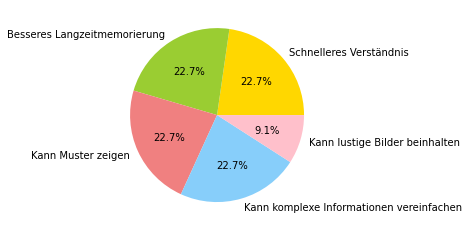

In [6]:
# we use matplotlib for the creation of visualizations
import matplotlib.pyplot as plt
# this is only required for Jupyter notebooks
%matplotlib inline 

# data to plot
labels = ['Schnelleres Verständnis', 'Besseres Langzeitmemorierung',
          'Kann Muster zeigen', 'Kann komplexe Informationen vereinfachen',
          'Kann lustige Bilder beinhalten']
sizes = [25, 25, 25, 25, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink']

# plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

Es gibt viele Vorteile von Visualisierungen gegenüber anderen Arten Daten darzustellen, zum Beispiel Tabellen oder deskriptiver Statistik. Im Allgemeine verarbeitet man visuelle Informationen schneller. Hierdurch kann man in der Regel schneller etwas über die Daten lernen. Hinzu kommt das viele Menschen sich visualisierte Informationen besser merken können. 

Die Vorteile von Visualisierungen gehen jedoch über die Verarbeitungsgeschwindigkeit und die Memorisierung hinaus. Visualisierungen können auch ein Verständnis der Daten ermöglichen, welches man andernfalls nicht erlangen könnten, zum Beispiel über Muster in Daten und komplexe Zusammenhänge, die man sonst nicht sehen könnte. Hierfür betrachten wir das folgende Beispiel. Alice kennt Bob und Dan, Dan kennt Bob, Bob kennt Carol und Alace, und Carol kennt Alice, Bob und Dan. Diese textuelle Beschreibung ist sehr komplex und schwer zu folgen. Außerdem bekommt man kein intuitives Verständnis der Beziehung zwischen Alice, Bob, Carol und Dan. Jetzt betrachten wir das gleiche als gerichteten Graph:

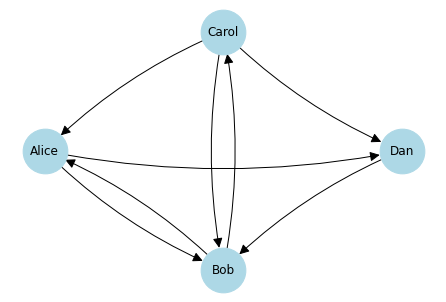

In [7]:
import networkx as nx  # networkx is a powerful library for working with graphs

# Create the graph by adding edges
# The vertices are implicitly defined through the endpoints of the edges
graph = nx.DiGraph()
graph.add_edge('Alice', 'Bob')
graph.add_edge('Alice', 'Dan')
graph.add_edge('Dan', 'Bob')
graph.add_edge('Bob', 'Carol')
graph.add_edge('Bob', 'Alice')
graph.add_edge('Carol', 'Alice')
graph.add_edge('Carol', 'Bob')
graph.add_edge('Carol', 'Dan')

# Plot the graph with a shell layout
nx.draw_shell(graph, with_labels=True, node_size=2000, node_color='lightblue',
              arrowsize=20, connectionstyle='arc3, rad = 0.1')

Dieser Graph ist einfach zu lesen und gibt uns ein intuitives Verständnis der Beziehungen. 

Bitte beachten Sie, dass wir bei allen Grafiken in diesem Kapitel Legenden und andere Details bewusst weglassen. Stattdessen generieren wir die Grafiken mit so möglichst wenig Quelltext, so dass sie trotzdem die gewünschten Erkenntnisse liefern. Der Grund hierfür ist, dass wir hier Visualisierungen als Werkzeug zur Erkundung von Daten betrachten. Wenn man Visualisierungen für Texte (Bücher und sonstige Publikationen) oder Präsentation erstellt, sind andere Aspekte ebenfalls relevant, zum Beispiel die konsistente Beschriftung, Farbwahl, Legenden, und Titel. 

### Anscombes Quartett

Anscombes Quartett ist ein berühmtes Beispiel für Daten, in dem deskriptive Statistiken irreführend sind. Das Beispiel basiert auf vier Datensätzen  $(x_1, y_1), ..., (x_4, y_4)$ mit je elf Paaren aus zwei Variablen $x_i$ und $y_i$, $i=1, ..., 4$. {numref}`tbl-anscombe` zeigt die Werte für jedes der Paare. 

```{table} Anscombes Quartett. 
:name: tbl-anscombe

| $x_{1,2,3}$ | $y_1$ | $y_2$ | $y_3$ | $x_4$ | $y_4$ |
|-------------|-------|-------|-------|-------|-------|
| 10          | 8.04  | 9.14  | 7.46  | 8     | 6.58  |
| 8           | 6.95  | 8.14  | 6.77  | 8     | 5.76  |
| 13          | 7.58  | 8.74  | 12.74 | 8     | 7.71  |
| 9           | 8.81  | 8.77  | 7.11  | 8     | 8.84  |
| 11          | 8.33  | 9.26  | 7.81  | 8     | 8.47  |
| 14          | 9.96  | 8.10  | 8.84  | 8     | 7.04  |
| 6           | 7.24  | 6.13  | 6.08  | 8     | 5.25  |
| 4           | 4.26  | 3.10  | 5.39  | 19    | 12.50 |
| 12          | 10.84 | 9.13  | 8.15  | 8     | 5.56  |
| 7           | 4.82  | 7.26  | 6.42  | 8     | 7.91  |
| 5           | 5.68  | 4.74  | 5.73  | 8     | 6.89  |
```

Wenn wir das arithmetische Mittel und die Standardabweichung betrachten, sehen wir das die Werte für alle $x_i$ und für alle $y_i$ gleich sind.

In [8]:
import numpy as np  # we now also need numpy, the commonly used numerics libarary for Python

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]) # same for x1, x2, and x3
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96,
               7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26,
               8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81,
               8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04,
               5.25, 12.50, 5.56, 7.91, 6.89])

print('Arithmetisches Mittel')
print('x1, x2, x3 = ', statistics.mean(x))
print('x4         = ', statistics.mean(x4))
print('y1         = ', statistics.mean(y1))
print('y1         = ', statistics.mean(y2))
print('y1         = ', statistics.mean(y3))
print('y1         = ', statistics.mean(y4))

print('Standardabweichung')
print('x1, x2, x3 = ', statistics.stdev(x))
print('x4         = ', statistics.stdev(x4))
print('y1         = ', statistics.stdev(y1))
print('y1         = ', statistics.stdev(y2))
print('y1         = ', statistics.stdev(y3))
print('y1         = ', statistics.stdev(y4))

Arithmetisches Mittel
x1, x2, x3 =  9
x4         =  9
y1         =  7.500909090909091
y1         =  7.500909090909091
y1         =  7.5
y1         =  7.500909090909091
Standardabweichung
x1, x2, x3 =  3.3166247903554
x4         =  3.3166247903554
y1         =  2.031568135925815
y1         =  2.0316567355016177
y1         =  2.030423601123667
y1         =  2.0305785113876023


Es gibt sogar noch mehr Gemeinsamkeiten. Wenn wir eine lineare Regression von $y_i$ durch $x_i$ bestimmen würden (siehe [Kapitel 8](kapitel_08)), würden wir jedes Mal die gleiche Regressionsgerade $y=3+0.5\cdot x$ finden. Statistisch sind sich diese vier Datensätze also sehr ähnlich. Wenn wir uns die Daten durch einen einfach *Scatterplot* visualisieren, sehen wir das die Datensätze eigentlich sehr unterschiedlich sind.

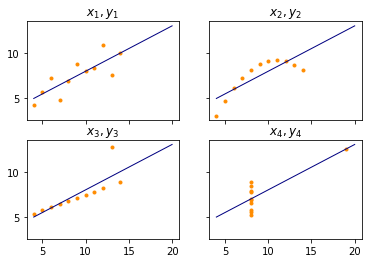

In [9]:
xfit = np.array([4, 20])
yfit = 3+0.5*xfit

f, axes = plt.subplots(2, 2, sharey=True, sharex=True)
axes[0, 0].plot(x, y1, color='darkorange', marker='.', linestyle='none')
axes[0, 0].plot(xfit, yfit, color='navy', lw=1)
axes[0, 0].set_title('$x_1, y_1$')
axes[0, 1].plot(x, y2, color='darkorange', marker='.', linestyle='none')
axes[0, 1].plot(xfit, yfit, color='navy', lw=1)
axes[0, 1].set_title('$x_2, y_2$')
axes[1, 0].plot(x, y3, color='darkorange', marker='.', linestyle='none')
axes[1, 0].plot(xfit, yfit, color='navy', lw=1)
axes[1, 0].set_title('$x_3, y_3$')
axes[1, 1].plot(x4, y4, color='darkorange', marker='.', linestyle='none')
axes[1, 1].plot(xfit, yfit, color='navy', lw=1)
axes[1, 1].set_title('$x_4, y_4$')
plt.show()

Die orangen Punkte visualisieren die Daten selbst, die blauen Linien zeigen die Regressionsgerade für $y=3+0.5\cdot x$, die optimal ist für die Daten. Nur basierend auf den statistischen Informationen über die Daten, würde man erwarten dass die Daten etwa so wie beim Paar $x_1$, $y_1$ aussehen: Die Daten haben eine etwa lineare Beziehung mit einer leichten Streuung ohne ein klar erkennbares Muster um die Regressionsgerade. Eine lineare Beziehung zwischen $x$ und $y$ bedeutet, dass wenn $x$ sich verändert, sich $y$ um ein konstantes vielfaches von $x$ verändert. Das bedeutet umgekehrt auch, dass man die Beziehung von $x$ und $y$ sich etwa als Gerade vorstellen kann. Beim Paar $x_2$, $y_2$ is dies nicht der Fall, stattdessen sehen die Daten eher aus wie eine auf den Kopf gestellte Parabel. Das Paar $x_3$, $y_3$ ist eigentlich perfekt linear, bis auf einen einzelnen Datenpunkt, der nach oben ausreißt und dafür sorgt das die blaue Regressionsgerade nicht zur eigentlichen Geraden, auf der die Daten liegen, passt. Das Paar $x_4$, $y_4$ passt nicht zu dem was die Statistiken aussagen, welche auch wieder von einem Ausreißer stark beeinflusst werden. 

Die Aussage von Anscombes Quartett ist somit eindeutig: Auch wenn Statistiken gut geeignet sein können Daten zusammenzufassen, ist es ebenso möglich, dass die Statistiken irreführend sind. Der kritische Leser wird vielleicht bemerkt haben, dass die durch Ausreißer verursachten Probleme beim arithmetischen Mittel und der Standardabweichung zu erwarten sind. Die Probleme von Statistiken sind jedoch grundlegender und es gibt weitere Beispiele die auch mehr statistische Marker berücksichtigen [^datasaurus]. 

### Einzelne Merkmale

Eine grundlegende Betrachtung der Daten ist die Visualisierung einzelner Merkmale der Daten. Hierdurch kann man die Verteilung dieser Merkmale verstehen, ähnlich zur Beschreibung durch Statistiken. Hierzu betrachten wir Histogramme, Densityplots, Rugs, und Boxplots. 

Wir betrachten diese Feature anhand von Daten über Hauspreise aus Boston die 1978 veröffentlich wurden, welche wir im Folgenden einfach als Bostondaten bezeichnen werden. 

In [10]:
# sklearn is a large machine learning library that we use
from sklearn import datasets
from textwrap import TextWrapper

# we use this wrapper to avoid printing lines that are too long because this should be readable as a book
# usually you would still just use print
wrapper = TextWrapper(width=65, replace_whitespace=False, break_long_words=False)
def wrap_print(string):
    for line in string.split('\n'):
        print('\n'.join(wrapper.wrap(line)))

boston = datasets.fetch_openml(data_id=531)
wrap_print(boston.DESCR)

**Author**:
**Source**: Unknown - Date unknown
**Please cite**:

The Boston house-price data of Harrison, D. and Rubinfeld, D.L.
'Hedonic
prices and the demand for clean air', J. Environ. Economics &
Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression
diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the
table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over
25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river;
0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTR

Die obige Beschreibung beinhaltet ist ein Beispiel von Metadaten, in diesem Fall die Dokumentation der Daten. 

> **Bemerkung:**
>
> Die Bostondaten werden immer häufiger kritisiert und wurden zum Beispiel auch als Beispieldatensatz aus scikit-learn entfernt. Der Grund hierfür ist, dass die Daten aus ethischer Sicht hochproblematisch sind: Die Daten sind teilweise rassistisch, insbesondere das Merkmal `B`. In diesem Buch verwenden wir diese Daten dennoch weiter und Nutzen den Datensatz, um nicht nur zu zeigen wie man Daten analysieren kann, sondern auch als Beispiel das man ethische Aspekte von Daten und Modellen niemals vergessen sollte. 

Wir werfen jetzt einen genaueren Blick auf das Merkmal `MEDV`, den Median des Werts der Eigenheime in 1000 Dollar. *Histogramme* sind eine einfache und oft effektive Art etwas über die Verteilung von Daten zu lernen.

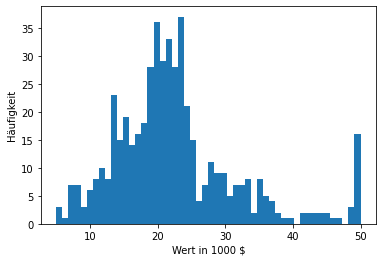

In [11]:
fig, ax = plt.subplots()
ax.hist(boston.target, bins=50)
ax.set_xlabel('Wert in 1000 $')
ax.set_ylabel('Häufigkeit')
plt.show()

Das Histogramm zeigt wie häufig Werte vorkommen. Hierfür wird der Wertebereich in sogenannte *Bins* unterteilt. Das Begriff Bin ist vom Englischen Wort für gruppieren abgeleitet. Das Histogramm zeigt an wie viele Datenpunkte in jedem Bin liegen. Im obigen Beispiel haben wir 50 Bins. Das Histogramm verrät uns viel über die Daten. 

- Die Daten zwischen 0 und 30 scheinen normalverteilt zu sein. Dies erkennt man daran, dass die Daten etwa eine *Glockenform* (engl. bell-shape) haben, was für die Normalverteilung typisch ist. Der Mittelwert dieser Normalverteilung liegt ca. bei 22. Dies erkennt man am *Peak* in diesem Wertbereich. Die Standardabweichung kann man nicht genau ablesen, aber mit Hilfe der oben diskutierten 68-95-99 Regel grob abschätzen. Der Wert sollte sich zwischen 7 und 11 befinden. 
- Neben dieser Normalverteilung gibt es noch viele Werte am rechten Rand der Grafik, also bei genau 50. Dies deutet darauf hin, dass es in Wirklichkeit vermutlich auch noch Werte oberhalb von 50 gibt, diese aber zusammengefasst wurden. Die eigentliche Bedeutung des Werts 50 ist somit nicht Häuser mit einem Wert von 50.000 Dollar, sondern Häuser die mindestens 50.000 Dollar Wert sind. 
- Es gibt einen *Tail* auf der rechten Seite des Grafik, also Häuser die teuer sind. Diese Häuser kommen zwar vor, lassen sich aber nicht mehr durch die Normalverteilung erklären. Solche Daten nennt man auch *Rechtsschief* (engl. right skew). 

Wir können uns `MEDV` auch mit Hilfe von einem Densityplot angucken. 

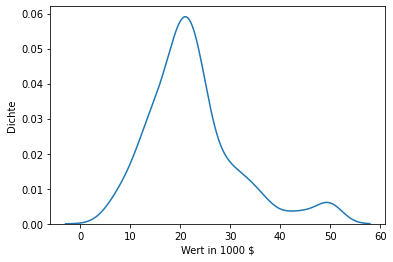

In [12]:
import seaborn as sns  # seaborn is a visualization libary build on top of matplotlib

fig, ax = plt.subplots()
sns.kdeplot(boston.target, ax=ax)
ax.set_xlabel('Wert in 1000 $')
ax.set_ylabel('Dichte')
plt.show()

Vereinfacht gesagt, zeigen Densityplots eine Schätzung der Dichtefunktion der Wahrscheinlichkeitsverteilung der Daten. Wir können uns das als eine Art kontinuierliches Histogramm vorstellen. Der Vorteil von Densityplots gegenüber Histogrammen ist, dass es oft einfacher ist die Verteilung der Daten zu erkennen. Im obigen Beispiel erkennt man die Glockenform und die Position des Peaks besser und kann dadurch die Normalverteilung in der linken Hälfte des Plots besser erkennen. Densityplots haben jedoch auch einige Nachteile im Vergleich zu Histogrammen. Ein kleiner Nachteil ist, das es schwierig ist, die Werte der y-Achse zu interpretieren. Während ein Histogram eine klare Aussage über die Anzahl der Datenpunkte in einem Bin erlaubt, sieht man im Densityplot lediglich die *Dichte* als Wert zwischen 0,0 und 1,0. Die Dichte ist mehr oder weniger der Anteil der Daten, der an einem bestimmten Punkt auf der x-Achse zu erwarten ist. 

Der zweite Nachteil der Densityplots ist gravierender. Das Histogramm zeigt uns klar die vielen Datenpunkte mit dem Wert 50 und auch, dass es keine Datenpunkte mit einem höheren Wert gibt. Im Densityplot sieht man bei der 50 nur einen kleinen Peak, den man auch als weitere Normalverteilung mit dem Mittelwert 50 am rechten Rand der Daten interpretieren könnte. Das ist irreführend und versteckt die wahre Verteilung der Daten. Dieses Risiko lässt sich bei Densityplots auch nicht vermeiden, da es mit der Technik, wie die Dichte geschätzt wird, zusammenhängt. Solche Fehlinterpretationen  der Daten sind dann wahrscheinlich, wenn die Daten nicht sehr dicht verteilt sind (großer Datenbereich mit verhältnismäßig wenig Datenpunkten) sowie an den Grenzen der beobachteten Daten. Hier geht die geschätzte Dichtefunktion automatisch über den beobachteten Datenbereich hinaus, was eventuell aber der Interpretation eines Merkmals widerspricht. Man erkennt im obigen Plot zum Beispiel auch, das die Werte kleiner 0 nicht eine Dichte von 0 haben, was bedeuten würde das einige Eigenheime einen negativen Wert hätten. 

> **Bemerkung:**
>
> Densityplots werden mit Hilfe von *Kernel Density Functions* (KDE) erstellt, in der Regel mit Hilfe der Dichtefunktion der Normalverteilung. Diese Dichtefunktion wird dann an jeden Datenpunkt mit *Skalierungs-* und *Bandbreitenparametern* geschätzt. Anschließend werden alle diese geschätzten Dichtefunktionen aufaddiert um den Densityplot zu erstellen. Hierdurch kann man auch das Verhalten an den Grenzen erklären: Die Dichtefunktion die an den äußersten Punkten der Daten geschätzt wird geht Aufgrund der Symmetrie der Normalverteilung automatisch über den Datenbereich hinaus. Die Skalierung der Schätzung führt dazu, dass ein seltsames Verhalten wie viele gleiche Werte an einer Grenze in der aufsummierten Dichtefunktion nicht stark auffällt. 

Ein einfaches Mittel dieses Problem zu vermeiden ist es einen *Rug* anzuzeigen. Der *Rug* hat seinem Namen da er wie ein Teppich unter den Plot gelegt wird. 

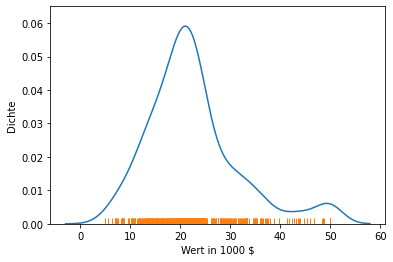

In [13]:
fig, ax = plt.subplots()
sns.kdeplot(boston.target, ax=ax)
sns.rugplot(boston.target, ax=ax)
ax.set_xlabel('Wert in 1000 $')
ax.set_ylabel('Dichte')
plt.show()

Der Rug zeigt wo sich wirklich Datenpunkte befinden. In Kombination mit dem Densityplot können wir also sehen, dass es keine Datenpunkte kleiner als 5 oder größer 50 gibt. Wir sehen auch, dass die die Region zwischen 38 und 50 nur relativ dünn besiedelt ist, wobei die Punkte in diesem Bereich etwa gleichverteilt zu sein scheinen. Hierzu passt dass der Densityplot in diesem Bereich fast parallel zur x-Achse ist. Dies zeigt das der Rug hilft weitere Erkenntnisse über die Daten zu gewinnen und Fehlinterpretationen  zu vermeiden.

Man kann auch einfach alle oben betrachten Ansätze kombinieren und Histogramm, Densityplot, und Rug zusammen visualisieren. 

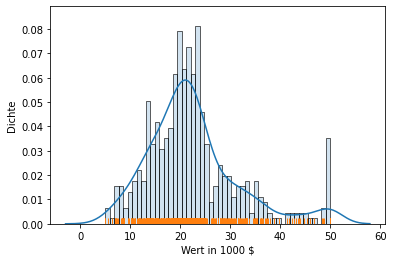

In [14]:
fig, ax = plt.subplots()
# stat='density' scales the plot to match the y-axis of the density plot
# alpha=0.2 makes the bars transparent for better readability
sns.histplot(boston.target, stat='density', alpha=0.2, bins=50, ax=ax)
sns.kdeplot(boston.target, ax=ax)
sns.rugplot(boston.target, ax=ax)
ax.set_xlabel('Wert in 1000 $')
ax.set_ylabel('Dichte')
plt.show()

In diesem Plot können wir sehen wo es Datenpunkte gibt (Rug), wie viele Daten in jedem Bereich liegen (Bins), und bekommen außerdem noch eine Schätzung der Dichtefunktion (Densityplot). Wir kombinieren also alle Vorteile von Histogrammen und Densityplots. Lediglich das Problem der Interpretation der y-Achse der Densityplots bleibt, wir können also nicht ablesen, wie viele Datenpunkte genau in einem Bin liegen. Falls dies relevant ist, muss man auf ein reines Histogramm zurückgreifen. 

Das Merkmal `MEDV` verhält sich aus statistischer Sicht relativ gut: Es ist großteils normalverteilt, wenn auch etwas rechtsschief. Außerdem gibt es noch eine Gruppierung aller Werte die größer sind als 50. Dies kann unter Umständen später zu Problemen führen und sollte berücksichtigt werden. Jetzt gucken wir uns ein zweites Merkmal an, bei dem es nicht ganz so einfach ist. `CRIM` ist in den Bostondaten definiert als die Kriminalitätsrate in einer Gegend.

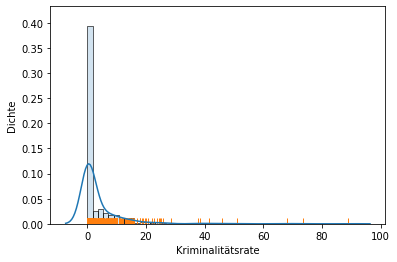

In [15]:
fig, ax = plt.subplots()
sns.histplot(boston.data['CRIM'], stat='density', alpha=0.2, bins=50, ax=ax)
sns.kdeplot(boston.data['CRIM'], ax=ax)
sns.rugplot(boston.data['CRIM'], ax=ax)
ax.set_xlabel('Kriminalitätsrate')
ax.set_ylabel('Dichte')
plt.show()

Der Plot zeigt, dass die meisten Daten sehr nah bei null liegen, der Datenbereich bis ca. 15 jedoch insgesamt sehr dicht Besiedelt ist. Bei höheren Werten scheint es sich eher im Ausreißer zu handeln. Da die Daten nahe null so dicht sind, ist es sehr schwer mehr zu erkennen. Bei solchen Daten könnte es sich um exponentiell verteilte Daten handeln. Daher sollte an einen einfachen Trick ausprobieren und den Logarithmus der Daten betrachten. Wir betrachten also nicht die Daten $x$ direkt, sondern stattdessen $\log(x+1)$. Die Addition von eins ist ein Glättungsparameter der auch als *Laplace Smoothing* bekannt ist. Durch diesen Glättungsfaktor vermeiden wir das Problem, dass der Logarithmus von 0 undefiniert ist. Da $\log(1)=0$ ist insbesondere auch $\log(0+1)=0$, was bedeutet das sich der Nullpunkt der Daten nicht verschiebt. 

> **Bemerkung:**
>
> Laplace Smoothing ist sogar etwas generischer als die einfache Addition von eins. Im Allgemeinen kann jede beliebige Konstante addiert werden. Die obige Variante wird daher auch oft als *Add-One Smoothing* bezeichnet. Diese Art der Glättung des Logarithmus ist so verbreitet, dass die Bibliothek numpy sogar extra die Funktion log1p sowie auch die Umkehrfunktion exp1m zu Verfügung stellt.

Betrachten wir jetzt also den Logarithmus der Kriminalitätsrate. 

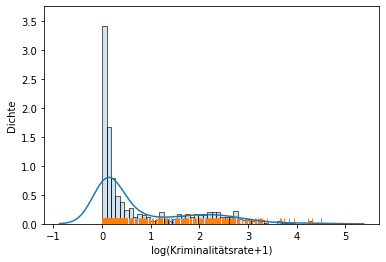

In [16]:
fig, ax = plt.subplots()
sns.histplot(np.log1p(boston.data['CRIM']), stat='density', alpha=0.2, bins=50, ax=ax)
sns.kdeplot(np.log1p(boston.data['CRIM']), ax=ax)
sns.rugplot(np.log1p(boston.data['CRIM']), ax=ax)
ax.set_xlabel('log(Kriminalitätsrate+1)')
ax.set_ylabel('Dichte')
plt.show()

In diesem Plot erkennt man schon mehr Informationen über die Kriminalitätsrate:

- Etwa 80% der Gegenden sind nahezu ohne Kriminalität. Das viele Daten nah bei null sind konnte man zwar bereits ohne den Logarithmus erkennen, aber den Anteil der Daten kann man jetzt klarer erkennen. Man erkennt auch das die Kriminalitätsrate zwischen null und eins nahezu monoton abfällt, so dass dieser Teil der Daten etwa wie die Rechte hälfte der Glockenform einer Normalverteilung aussieht. 
- Die restlichen 20% der Daten anfangend ab ca. eins scheinen einer *Log-Normal* Verteilung zu Folgen. Man nennt eine Verteilung Log-Normal, wenn die Daten Normalverteilt sind nachdem man sie logarithmiert hat. Dies scheint hier der Fall zu sein, wie man an der sehr flachen Glockenform in der Mitte des Plots erkennt. Der Mittelwert scheint bei ca. 2,2 zu sein und die Standardabweichung scheint relativ groß zu sein, weshalb die Daten weit streuen. Bitte beachten sie das der Mittelwert von 2,2 für die logarithmierten Kriminalitätsraten gilt, das heißt wir müssen erst die Umkehrung des Logarithmus berechnen um den eigentlichen Wert zu ermitteln. Wenn wir das tun finden wir heraus das der Log-Normale Abschnitt der Daten bei einer Kriminalitätsrate von etwa $e^1-1 \approx 1,7$ mit einem Mittel bei ca. $e^{2,2}-1 \approx 8,0$. 

Um zu überprüfen ob unsere Einschätzung, das der hintere Teil der Daten Log-Normal ist stimmt, können wir uns diese Daten auch noch einmal genauer angucken, in dem wir den Anzeigebereich einschränken und hierdurch den hinteren Bereich in der Anzeige vergrößern. 

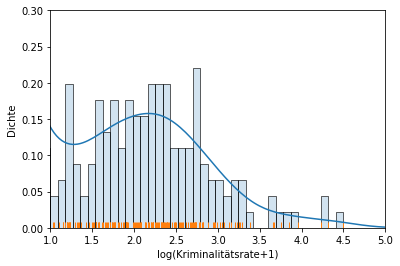

In [17]:
fig, ax = plt.subplots()
sns.histplot(np.log1p(boston.data['CRIM']), stat='density', alpha=0.2, bins=50, ax=ax)
sns.kdeplot(np.log1p(boston.data['CRIM']), ax=ax)
sns.rugplot(np.log1p(boston.data['CRIM']), ax=ax)
ax.set_xlabel('log(Kriminalitätsrate+1)')
ax.set_ylabel('Dichte')
ax.set_xlim(1,5)
ax.set_ylim(0,0.3)
plt.show()

Wie man sieht wird die Einschätzung hierdurch bestätigt. 

Für die nächsten Beispiele nutzen wir einen anderen Datensatz, nämlich die *Irisdaten*. 

In [18]:
from sklearn import datasets

iris = datasets.load_iris()
wrap_print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and
the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica

    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :

Oben sehen wir die Beschreibung der Irisdaten. Es handelt sich um einen Datensatz über drei verschiedene Arten von der Blume Iris (Setosa, Versicolour, Virginica) durch jeweils vier Merkmale. Diese Merkmale sind die die Länge und Breite der Blütenblätter (engl. *sepal*) und der Kelchblätter (engl. *petal*). 

Boxplots sind eine weitere Möglichkeit, wie wir uns einzelne Merkmale, aber auch mehrere Merkmale gleichzeitig visualisieren können. 

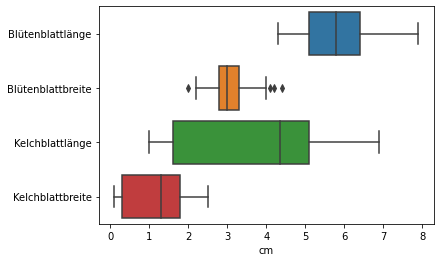

In [19]:
import pandas as pd  # pandas is a powerful library for working with data

# we need that data as dataframe for the pairplot feature of seaborn
iris_df = pd.DataFrame(iris.data, columns=[
    'Blütenblattlänge', 'Blütenblattbreite', 'Kelchblattlänge', 'Kelchblattbreite'])

fig, ax = plt.subplots()
sns.boxplot(data=iris_df, orient='h')
ax.set_xlabel('cm')
plt.show()

Ein Boxplot besteht aus einer Box, die an jeder Seite noch eine Linie hat, die sogenannten *Whisker*. Daher sind diese Plots auch als *Box-Whisker-Plots* bekannt. Die Grenzen der Box sind durch das untere Quartil $Q_{lower}$ und das obere Quartil $Q_{upper}$ bestimmt. Daraus folgt, dass die Länge der Box der Interquartilsabstand ist. In der Box sieht man noch eine Linie. Diese Linie markiert den Median der Daten. Die Definition der Whisker ist etwas komplizierter. Das Ende der unteren Linie ist der kleinste beobachtete Datenpunkt, der maximal das 1,5-Fache das Interquartilsabstands vom unteren Quartil entfernt ist, also $\min \{x_i: x_i>Q_{lower}-1.5\cdot IQR, i=1, ..., n\}$. Analog ist das Ende der oberen Linie der größte beobachtete Datenpunkt, der maximal das 1,5-Fache des Interquartilsabstands vom oberen Quartil entfernt ist, also $\max \{x_i: x_i>Q_{upper}+1.5\cdot IQR, i=1, ..., n\}$. Die Idee der Whisker ist es den Datenbereich ohne Ausreißer darzustellen. Entsprechend ist jeder Wert, der mehr als das 1,5-Fache des Interquartilsabstands von den Quartilen entfernt ist, ein Ausreißer. Sollte es Ausreißer geben, werden diese als Punkte dargestellt, wie man sie zum Beispiel bei der `sepal_width` sieht. 

Im Endeffekt ist ein Boxplot also nur eine Visualisierung von nicht-parametrischen deskriptiven Statistiken und von Ausreißern. Dennoch kann man mit Boxplots auf einen Blick viel über die Daten lernen:

- Die Lage der Boxen zeigt den Bereich an, in dem sich der Großteil der Daten befindet. 
- Die Größe der Boxen zeigt, wie stark der mittlere Bereich verstreut ist. 
- Die Länge der Whisker zeigt den Datenbereich (ohne Ausreißer). 
- Sowohl die Existenz, Anzahl und Lage von Ausreißern wird dargestellt. Hierdurch erkennt man insbesondere auch ob Ausreißer sich in der Nähe der Whisker befinden oder weit sie von den Daten entfernt. 
- Die Lage des Medians sowie die Länge der Whisker geben darüber Aufschluss ob die Daten möglicherweise symmetrisch sein könnten. Dies erkennt man, indem man überprüft ob der Median etwa in der Mitte der Box liegt und die Whisker gleich lang. 

Über die Irisdaten können wir zum Beispiel folgendes Lernen: 

- Die Merkmale haben nicht den gleichen Datenbereich. Der Datenbereich der Kelchblattlänge ist etwa doppelt so groß wie der Bereich der Kelch- und Blütenblattbreite und ebenfalls deutlich größer als der Datenbereich der Blütenblattlänge. 
- Es gibt nur wenige Ausreißer in den Daten. Nur bei der Blütenblattbreite gibt es einige Ausreißer. Diese liegen aber sehr nah an den Whiskern. Außerdem ist der Interquartilsabstand sehr klein, wodurch natürlich auch das 1.5-Fache des Interquartilsabstands sehr klein ist. Es handelt sich bei diesen Ausreißern daher nicht um implausibel große Datenpunkte, sondern vielmehr um ein Artefakt in Folge der Strategie wie die Ausreißer bestimmt werden. 

Wie man sieht sind die Informationen von der Art her anders als bei Histogrammen und Densityplots. Die Histogramme und Densityplots gut geeignet um die Verteilung von Daten zu verstehen und ein sehr detailliertes Bild der Daten zu bekommen. Bei Boxplots liegt der Fokus auf allgemeinen statistischen Eigenschaften der Daten. Mit Hilfe eines Boxplots kann man schnell statistische Merkmale der Verteilungen von mehreren Merkmalen erfassen und miteinander vergleichen. 

### Beziehungen zwischen Merkmalen

Bisher haben wir Merkmale nur unabhängig voneinander visualisiert. Bei den Boxplots haben wir zwar bereits Boxen für mehrere Merkmale in einer Visualisierung angezeigt, die Boxen haben sich jedoch dennoch nur auf ein einzelnes Merkmal bezogen. Man kann zu einem gewissen Grad die Beziehung zwischen einem kategorischen Merkmal und numerischen Merkmalen mit Hilfe von Boxplots darstellen. Wir können zum Beispiel die Kelchblattlänge für die verschiedenen Arten der Iris darstellen. 


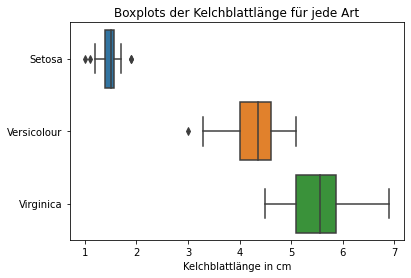

In [20]:
fig, ax = plt.subplots()
sns.boxplot(x=iris_df['Kelchblattlänge'], y=iris.target, orient='h', ax=ax)
ax.set_title('Boxplots der Kelchblattlänge für jede Art')
ax.set_xlabel('Kelchblattlänge in cm')
ax.set_yticks((0,1,2))
ax.set_yticklabels(('Setosa', 'Versicolour', 'Virginica'))
plt.show()

Aus diesem Boxplot können wir viel über die Beziehung der Kelchblattlänge und den Arten der Iris lernen. 

- Die Kelchblattlänge von Setosa ist immer kleiner als 2,5 cm. Die anderen Arten haben immer eine Kelchblattlänger die größer als 2,5 cm ist. 
- Die Virginica hat immer eine Kelchblattlänge größer als 4,3 cm. Aus diesen beiden Beobachtungen folgt, dass alle Iris mit einer Kelchblattlänge zwischen 2,5 cm und 4,3 cm Versicolours sein müssen. 
- Die Kelchblattlänge der Versicolour ist immer kleiner als 5,1 cm. Es folgt also dass alle Iris mit einer Kelchblattlänge größer als 5,1 cm Virginica sein müssen. 
- Iris mit einer Kelchblattlänge zwischen 4,3 cm und 5,1 cm könnten sowohl Versicolour, als auch Virginica sein. 

Der Nachteil von Boxplots ist, das man Merkmale nur anhand von wenigen statistischen Eigenschaften vergleichen kann. Außerdem sind die Vergleiche beschränkt, da man nur ein kategorisches mit einem numerischen Merkmal vergleichen kann. Außerdem sollte das kategorische Merkmal nicht zu viele Kategorien haben, da es sonst sehr viele Boxen geben würde. 

Eine weitere Art sich Beziehungen zwischen Merkmalen anzugucken sind *paarweise Scatterplots*.

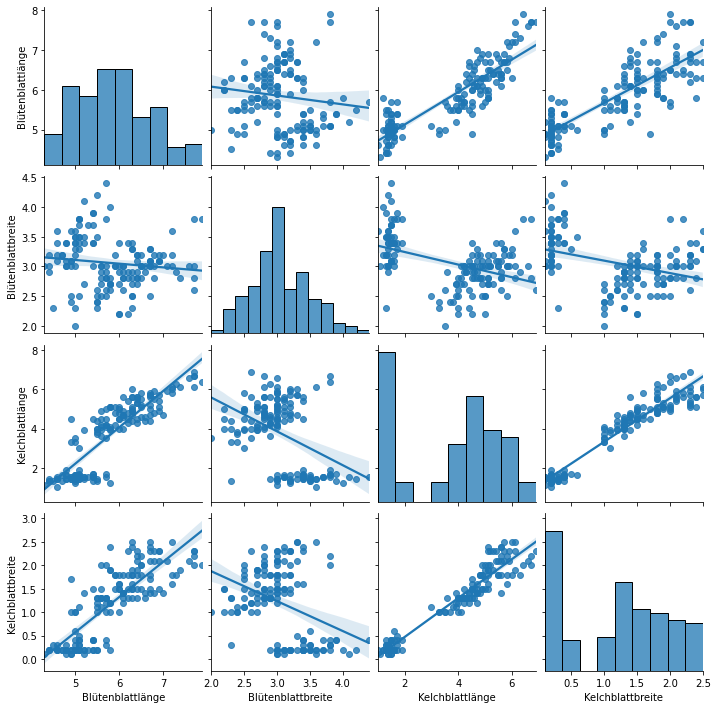

In [21]:
sns.pairplot(iris_df, kind='reg')
plt.show()

In einem paarweisen Scatterplot hat man nicht nur einen einzigen Plot, sondern eine Sammlung von Plots die als Matrix organisiert sind. Auf der Diagonale findet man Histogramme der Merkmale. Die anderen Plots zeigen die paarweisen Beziehungen zwischen je zwei Merkmalen. Die Geraden zeigen den linearen Zusammenhang zwischen den Daten, wie wir es schon von Anscombes Quartett kennen. Die Schattierung um die Geraden zeigen zusätzlich noch die Unsicherheit dieses Zusammehangs an. Je näher die Datenpunkte an den Geraden sind, desto kleiner die Unsicherheit und desto größer die Wahrscheinlichkeit, dass es tatsächlich einen linearen Zusammenhang gibt. Wenn die Steigung der Geraden negativ ist (abwärts), dann ist die Korrelation zwischen den Merkmalen negativ. Wenn die Steigung positiv ist, dann ist Korrelation zwischen den Merkmalen positiv. Die Werte welcher Merkmale auf der x-Achse, beziehungsweise y-Achse aufgetragen sind kann man am unteren, beziehungsweise linken Rand des Plots sehen. Der zweite Plot in der ersten Zeile zeigt zum Beispiel die Beziehung zwischen der Blütenblattbreite auf der x-Achse und der Blütenblattlänge auf der y-Achse. 

Ein paarweiser Scatterplot ermöglicht es uns viel über die Beziehungen zwischen Merkmalen zu lernen, aber auch über einzelne Merkmale über die Histogramme auf der Diagonalen. 

- Die Blütenblattbreite scheint normalverteilt zu sein, die Kelchblattbreite sieht eher wie ein Mix von zwei Normalverteilungen aus. 
- Die Beziehung zwischen der Blütenblattbreite und der Blütenblattlänge sieht zufällig aus. Dies erkennt man daran, dass sich die Punkte auf die komplette Fläche des Plots verteilen. 
- Die Kelchblattbreite hat eine positive Korrelation mit der Kelchblattlänge. Dies bedeutet, dass wenn sich die Länge erhöht, sich die Breite ebenfalls erhöht und umgekehrt. Diese Korrelation scheint linear zu sein, wie man daran erkennt das alle Datenpunkte sehr nah an der Regressionslinie sind. Es gibt also ein festes Verhältnis zwischen der Kelchblattbreite und Kelchblattlänge. 
- Man kann in den Plots der Kelchblätter zwei Gruppen in den Daten erkennen. Eine kleinere Gruppe wo die Werte niedrig sind und eine größere Gruppe mit höheren Werten. Zwischen den Gruppen ist eine größere Lücke. Ähnliche Gruppen findet man in nahezu allen Plots, wenn auch nichts so eindeutig. 

> **Bemerkung:**
>
> Wir betrachten das Konzept der Korrelation hier nicht im Detail. Die Idee ist aber relativ einfach: Man nennt zwei Merkmale X und Y *positiv korreliert*, wenn der Wert von X steigt in der Regel auch der Wert von Y steigt. Je häufiger dies der Fall ist, desto stärker die Korrelation. Umgekehrt nennt man eine Korrelation negativ, wenn der Wert von X fällt in der Regel auch der Wert von Y fällt. Eine *lineare Korrelation* bedeutet zusätzlich noch, dass es ein Muster gibt, so dass $X \approx a+b \cdot Y$ für zwei Konstanten $a, b \in \mathbb{R}$. Die Korrelation wird häufig mit Hilfe von *Korrelationskoeffizienten* gemessen deren Werte zwischen $[-1, 1]$ liegen. Eine Korrelationskoeffizient von 0 bedeutet, das zwei Merkmale nicht korreliert sind. Je näher die Werte an -1/1 sind, desto stärker ist die negative/positive Korrelation.

Für kategorische Variablen wie die Art der Iris kann man noch weitere Information aus einem paarweisen Scatterplot holen, in dem man die Kategorien als Farben nutzt. Zusätzlich kann man dann auch noch Densityplots pro Kategorie auf der Diagonalen anzeigen.

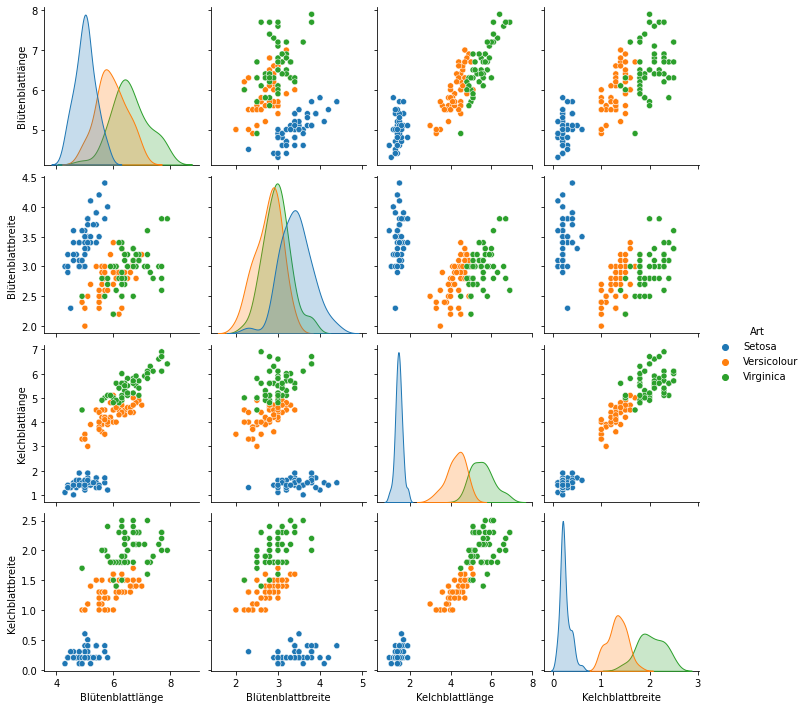

In [22]:
iris_df['Art'] = iris.target
iris_df.loc[iris_df['Art']==0, 'Art'] = 'Setosa'
iris_df.loc[iris_df['Art']==1, 'Art'] = 'Versicolour'
iris_df.loc[iris_df['Art']==2, 'Art'] = 'Virginica'
sns.pairplot(iris_df, hue='Art')
plt.show()

Durch die Farben können wir die Bedeutung der Gruppen erkennen, die wir oben schon gesehen haben: Die kleinere Gruppe sind die Setosas, während die größere Gruppe aus den Versicolours und Virginicas besteht. Diese Trennung ist ähnlich zu dem, was wir bereits im Boxplot gesehen haben. Wir sehen auch, dass man die Arten nur schwer mit Hilfe der Blütenblätter unterscheiden kann, insbesondere nicht zwischen Versicolours und Virginicas. Man sieht aber auch, dass man die drei Arten fast perfekt anhand der Kelchblätter unterscheiden kann.

Ein mögliches Problem von Scatterplots ist, dass man häufig sehr viele Datenpunkte in einem kleinen Bereich hat, so dass sich die Daten überlappen. Man spricht dann auch von einem *dichten* Bereich. Wenn man solche Daten als Scatterplot darstellt sieht man häufig nur einen großen Fleck. 

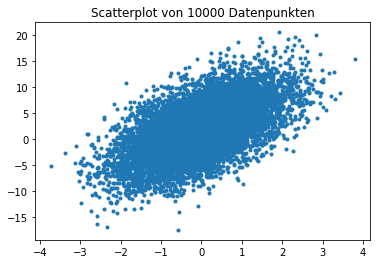

In [23]:
np.random.seed(0)
n = 10000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

plt.figure()
plt.title('Scatterplot von 10000 Datenpunkten')
plt.plot(x, y, marker='.', linestyle='none')
plt.show()

Innerhalb der dichten Region kann man die Struktur der Daten nicht erkennen. Im obigen Beispiel könnten die Daten in der Region zum Beispiel gleichverteilt, normalverteilt oder eine Mischung aus mehreren Verteilungen mit unterschiedlichen Peaks sein. Man verliert also wegen der Dichte wertvolle Informationen über die Daten. Es gibt zwei Arten, wie man mit dieses Problem lösen kann. Eine schnelle und sehr einfache Lösung ist es, die Datenpunkte transparent zu machen. 

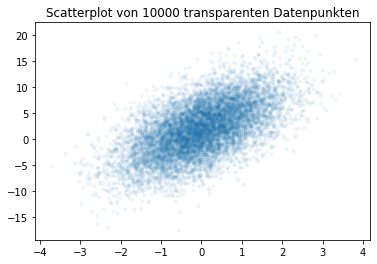

In [24]:
plt.figure()
plt.title('Scatterplot von 10000 transparenten Datenpunkten')
plt.plot(x, y, marker='.', linestyle='none', alpha=0.05)
plt.show()

Durch die Transparenz kann man die Struktur erkennen und sieht, dass die Daten normalverteilt sind mit dem Mittelwert im Zentrum der dichten Region. Der Nachteil dieser Lösung ist, dass man immer noch nicht sieht wie viele Daten genau in einer Region liegen, da es keine Farbskala gibt. Wenn dies ebenfalls wichtig ist, sollte man Hexbinplots verwenden. Hexbinplots sind mehr oder weniger zwei-dimensionale Histogramme: Die Daten sind in sechseckige Bins unterteilt und die Farbe zeigt wie viele Daten in einer Region liegen. 

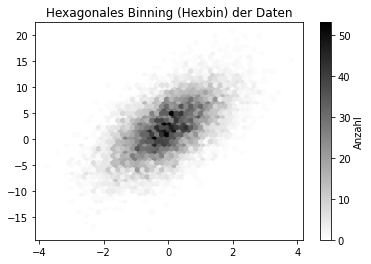

In [25]:
fig, ax = plt.subplots()
hb = ax.hexbin(x, y, gridsize=50, cmap='binary')
cb = fig.colorbar(hb)
cb.set_label('Anzahl')
ax.set_title("Hexagonales Binning (Hexbin) der Daten")
plt.show()

Im Hexbinplot können wir jetzt nicht nur die Struktur der Daten erkennen, sondern auch ablesen wie viele Datenpunkte sich in der dichten Region befinden. 

Die letzte Visualisierung, die wir uns bezüglich des Zusammenhangs von Merkmalen angucken wollen, betrachtet die Korrelationen zwischen den Merkmalen. Wir haben uns Korrelationen bereits im Zusammenhang mit Scatterplots durch die Regressionsgeraden angesehen. Dies ist jedoch relativ aufwendig, insbesondere wenn es viele Merkmale gibt. Der Aufwand steigt quadratisch mit der Anzahl der Merkmale. Eine effizientere Methode einen Überblick über die Korrelationen zu bekommen ist eine *Korrelationsheatmap*.

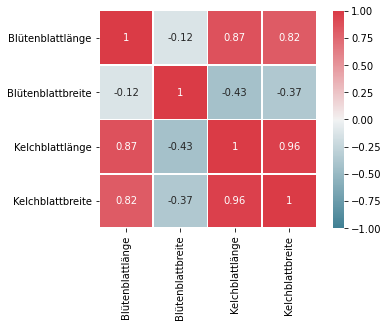

In [26]:
# Compute the correlation matrix that contains the correlation coefficients
corr = iris_df.corr()

# we use customized colors
fig, ax = plt.subplots()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, square=True, linewidths=.5, 
            vmin=-1.0, vmax=1.0, cmap=cmap, annot=True, ax=ax)
plt.show()

Eine Korrelationsheatmap visualisiert die Werte von Korrelationskoeffizienten zwischen den Merkmalen. Rot heißt, dass es eine positive Korrelation gibt, blau steht für negative Korrelation. Je schwächer die Farbe, desto schwächer die Korrelation. Konsequenterweise heißt weiß also, dass es keine Korrelation gibt. Auf der Diagonalen gibt es immer eine perfekte positive Korrelation, da selbstverständlich jedes Merkmal mit sich selbst korreliert ist. Außerdem sehen wir die Bestätigung unserer Erkenntnisse über die Korrelationen aus den paarweisen Scatterplots: Es gibt eine starke positive Korrelation zwischen der Breite und Länge der Kelchblätter und keine Korrelation bei den Blütenblättern. Man sieht jedoch noch weitere Korrelationen, zum Beispiel eine negative Korrelation zwischen der Kelchblattlänge und der Blütenblattbreite. 

> **Bemerkung:**
> Selbstverständlich kann man auch andere Farben zur Darstellung der Korrelationskoeffizienten nutzen. Wichtig ist jedoch, dass man eine Farbskala wählt, bei der man die Stärke der Korrelation gut erkennen kann und man gut zwischen positiver und negativer Korrelation unterscheiden kann. Das bedeutet insbesondere auch, dass man Werte in der Nähe von null gut erkennt. 

### Scatterplots für Hochdimensionale Daten

Häufig hat man sehr viele Dimensionen, so dass die Analyse von paarweisen Scatterplots schwierig wird. In diesem Fall kann man Methoden zur *Dimensionsreduktion* anwenden. Die Idee ist es hierbei, die Korrelationen zwischen den Merkmalen auszunutzen und neue Merkmale zu berechnen, die unkorreliert sind. Bei den neuen Merkmalen beinhalten dann möglichst wenige Merkmale möglichst viel der Information aus den ursprünglichen Daten. Ein beliebtes Verfahren hierfür ist die *Hauptkomponentenanalyse* (engl. *principal component analysis* / PCA). Bei der PCA wird der Raum von reellwertigen Merkmalen so transformiert, dass das erste Merkmal möglichst viel der Varianz der Daten erklärt, das zweite Merkmal den zweit größten Anteil, und so fort. Die neuen Merkmale nennt man auch die *Hauptkomponenten* (engl. *principal components*) der Daten. Da die Varianz eines Merkmals direkt verwand mit der vorhandenen Information ist, beinhaltet also die erste Hauptkomponente die meiste Information, die zweite Hauptkomponente die zweitmeiste Information, und so fort. Das liegt ganz einfach, dass konstante Merkmale keine Information beinhalten. Für die Irisdaten können wir uns mit der PCA die vier Merkmale auf die ersten zwei Hauptkomponenten reduzieren und mit der Farbe die Art der Iris darstellen. 

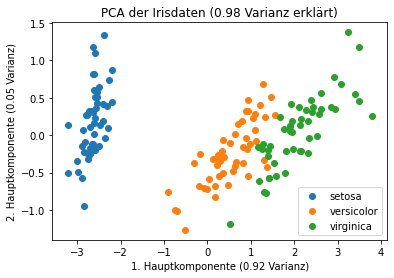

In [39]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)

fig, ax = plt.subplots()
for i, label in enumerate(iris.target_names):
    # we need to plot each type of iris on its own to get colors with a legend
    ax.scatter(iris_pca[iris.target==i,0], iris_pca[iris.target==i,1], label=label)
ax.set_xlabel('1. Hauptkomponente (%.2f Varianz)' % pca.explained_variance_ratio_[0])
ax.set_ylabel('2. Hauptkomponente (%.2f Varianz)' % pca.explained_variance_ratio_[1])
ax.set_title('PCA der Irisdaten (%.2f Varianz erklärt)' % sum(pca.explained_variance_ratio_[:2]))
plt.legend()
plt.show()

Die zwei Hauptkomponenten erklären bereits 98% der Varianz der Daten, also beinahe alle Information. Man sieht auch, dass sich die Arten der Iris sehr gut unterscheiden lassen und separate Gruppen in den Daten darstellen, auch wenn die Versicolor und die Virginica sehr nah beieinander liegen. Wenn die PCA weniger Varianz der Daten erklärt, kann es sein, dass auch wenn man keine Trennung von Gruppen sieht, sie dennoch da wäre: Man bräuchte dann nur die restliche Information, um dies zu sehen. 

Die PCA ist ein mächtiges Werkzeug um die Dimension von Daten zu reduzieren, ohne den Informationsgehalt zu veringern und insbesondere auch um sich hochdimensionale darzustellen. Dennoch gibt es zwei wesentliche Nachteile, die auch ähnliche Verfahren betreffen. Das erste Problem ist, dass nicht klar ist *wofür* die Hauptkomponenten stehen. Beim paarweisen Scatterplot war klar, welche Beziehungen gezeigt werden und somit auch welche Information. Die Hauptkomponenten sind linearkombinationen der Merkmale, wie diese kombiniert werden ist jedoch nicht offensichtlich. Hier könnte man sich höchstens noch die Transformation der PCA genauer betrachten, um an diese Information zu kommen. Das ist aber sehr komplex. Daher eignet sich PCA in der Regel nur dafür, um zu analysieren ob Daten entsprechend bestimmter Eigenschaften so aussehen wie erwartet oder erhofft (zum Beispiel ob die Arten von Iris gruppiert sind), es ist jedoch nicht ohne weitere möglich die Verteilung der Datenpunkte zu verstehen. Der zweite Nachteil ist, dass die Information möglichweise nicht mit dem Ziel der Analyse zusammenhängt. Wenn ein Fragebogen zur Kreditwürdigkeit die Lieblingszahl abfragen würde, hätte dies keinen Bezug zum eigentlich Ziel der Analyse und die Varianz dieser Information wäre entsprechend auch irrelevant. Daher sollte man bei der PCA vorher sicherstellen, dass nur Merkmale benutzt werden, die mit dem Ziel der Analyse zusammenhängen. 

> **Bermerkung:**
> 
> Für die PCA interpretiert man die Daten als Matrix $A$, wobei jede Zeile der Matrix eine Instanz ist. Anschließend muss man die folgenden Schritte durchführen. 
> - Zuerst müssen die Spalten der Matrix $A$ so skaliert werden, dass der Erwartungswert null ist ($A_0$). Hierdurch werden Skaleneffekte zwischen den Merkmalen vermieden und die folgenden Berechnungen vereinfacht. 
> - Anschließend wird die Kovarianzmatrix $Cov_A$ von $A_0$ berechnet. Wir berechnen also die Kovarianzen um die Korrelation zwischen den Merkmalen auszudrücken. 
> - Nun kann man die Eigenwerte und Eigenvektoren von $Cov_A$ berechnen. Die Eigenvektoren müssen Anhand ihrer Eigenwerte absteigend sortiert werden, so dass jeder Vektor die Spalte einer Matrix $Eig$ ist. Wenn man die Eigenwerte so reskaliert, dass ihre Summe eins ergibt, erhält man den Anteil der erklärten Varianz der jeweiligen Hauptkomponente. 
> - Durch die Matrixmultiplikation von $Eig$ und $A_0$ erhält man die Hauptkomponenten von $A$.

### Zeitliche Trends

Die bisherigen Visualisierungen sind alle davon ausgegangen, dass die einzelnen Datenpunkte nicht direkt miteinander zusammenhängen. Häufig gibt es jedoch Zusammenhänge, insbesondere bei Daten, die über einen gewissen Zeitraum erfasst worden sind. Als Beispiel betrachten wir jetzt Fluggastdaten einer US Airline aus den Jahren 1940 bis 1960. Die Werte geben die monatliche Anzahl von Passagieren an. 

In [28]:
!head data/AirPassengers.csv

Month,#Passengers
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136


Wir könnten auch solche Daten einfach unabhängig von der Zeit betrachten, zum Beispiel als Histogramm. 

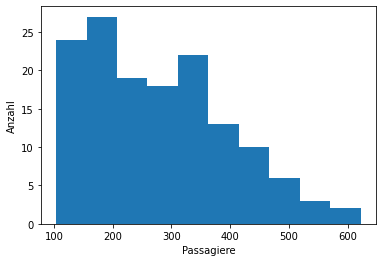

In [29]:
air_passengers_df = pd.read_csv("data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0, squeeze=True)

fig, ax = plt.subplots()
ax.hist(air_passengers_df)
ax.set_xlabel('Passagiere')
ax.set_ylabel('Anzahl')
plt.show()

Es ist nicht so, dass Histogramme bei über die Zeit verteilten Daten keine Informationen liefern würden. Man erkennt das es maximal 600 Passagiere in einem Monat gab und das es circa 20 Monate mit jeweils 100-150, 150-200, ..., bzw. 300-350 Passagieren gab. Was man jedoch nicht erkennt ist wie die sich Passagierzahlen mit der Zeit entwickelt haben. Hier könnten wir zum Beispiel einfach einen Scatterplot betrachten, wo die y-Achse die Passagierzahlen und die x-Achse die Monate anzeigt. 

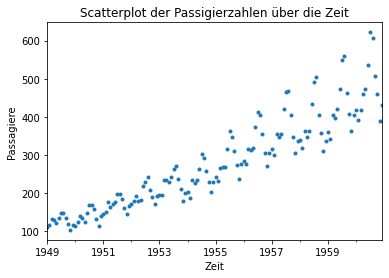

In [30]:
fig, ax = plt.subplots()
air_passengers_df.plot(linestyle='', marker='.', ax=ax)
ax.set_title("Scatterplot der Passigierzahlen über die Zeit")
ax.set_xlabel('Zeit')
ax.set_ylabel('Passagiere')
plt.show()

In diesem Scatterplot erkennt man den zeitlichen Verlauf der Daten. Man sieht einen klaren Trend der zeigt, dass die Passagierzahlen mit der Zeit steigen. Wie sich die Passagierzahlen von Monat zu Monat verändern, erkennt man jedoch nicht ohne weiteres. Hierfür müssen wir - im wahrsten Sinne des Wortes - die Punkte miteinander verbinden, um einen *Liniendiagramm* zu erhalten. 

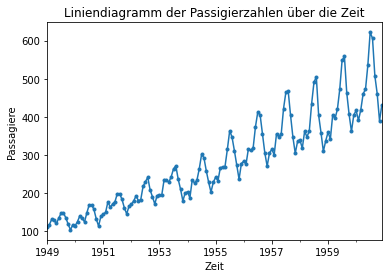

In [31]:
fig, ax = plt.subplots()
air_passengers_df.plot(marker='.', ax=ax)
ax.set_title("Liniendiagramm der Passigierzahlen über die Zeit")
ax.set_xlabel('Zeit')
ax.set_ylabel('Passagiere')
plt.show()

Im Liniendiagram können wir jetzt sowohl den Trend, als auch die Veränderungen von Monat zu Monat sehen. Man sieht auch ein Muster, welches sich jährlich wiederholt.

[^jupyterformat]: https://nbformat.readthedocs.io/en/latest/format_description.html
[^categorical]: https://doi.org/10.1080/10691898.2007.11889465
[^datasaurus]: https://doi.org/10.1145/3025453.3025912

## Übungen

In der ersten praktischen Übung geht es darum, selbst einige Daten zu erkunden. Hierzu benutzen wir auch die Bostondaten, die wir auch vorher schon in diesem Kapitel benutzt haben.

### Deskriptive Statistiken

Betrachten Sie die Bostondaten mit Hilfe von deskriptiven Statistiken. Berechnen die die Lage durch das arithmetische Mittel und den Median, die Variabilität durch die Standardabweichung und die IQR, sowie die Datenbereiche der Merkmale. Das Ziel dieser Aufgabe ist aber nicht die Berechnung dieser Werte, sondern ihre Interpretation. Überlegen Sie sich zum Beispiel, was man über das Merkmal CRIM über das arithmetische Mittel und den Median lernt. 

### Visualisierungen einzelner Merkmale

Betrachten Sie die Merkmale `zn` und `indus` mit Hilfe von Histogrammen und Densityplots (mit und ohne Rug). Was lernen Sie über diese Daten? Was sind die Vor- und Nachteile der verschiedenen Visualisierungen?

### Paarweise Beziehungen

Betrachten Sie die paarweisen Beziehungen der Bostondaten. Benutzen Sie hierfür Scatterplots und eine Korrelationsheatmap. Was lernen Sie über die Beziehungen aus den Daten? Beachten Sie hierbei insbesondere auch, ob sie ethisch problematische Eigenschaften finden. 